In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
X, y = digits.data, digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [4]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, 
                                                    random_state = 7)
N_test, _ = X_test.shape

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

y_test_pred = logistic.predict(X_test)

In [5]:
np.mean(y_test != y_test_pred)

0.052188552188552187

In [6]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

[[63  0  0  0  0  0  0  0  0  0]
 [ 0 52  0  3  0  0  0  0  1  1]
 [ 0  0 56  1  0  0  0  0  0  0]
 [ 0  0  0 53  0  1  0  1  1  1]
 [ 0  0  0  0 62  0  1  1  0  0]
 [ 0  0  0  0  0 50  0  0  0  1]
 [ 1  1  0  0  0  0 54  0  0  0]
 [ 0  0  0  0  1  0  0 57  0  0]
 [ 0  4  1  1  1  1  1  0 60  0]
 [ 0  0  0  1  0  1  0  1  3 56]]


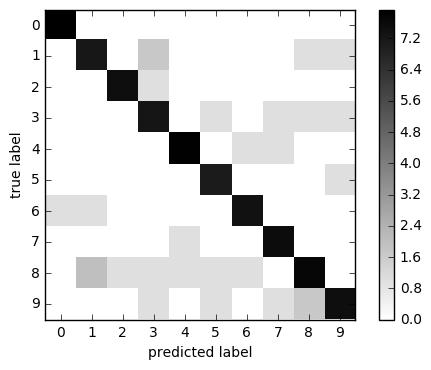

In [7]:
M = confusion_matrix(y_test, y_test_pred)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.grid(False)
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.colorbar()

In [ ]:
import random
plt.figure(figsize = (10, 10))
i_subplot = 1 
sample = np.random.choice(range(N_test), size=24)
for i in sample:
    yi_test_pred = logistic.predict(X_test[i, :].reshape(1,-1))[0]
    plt.subplot(8, 8, i_subplot)
    i_subplot += 1
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(X_test[i, :], (8, 8)), cmap = plt.cm.binary, 
               interpolation = 'nearest')
    plt.text(0, 7, str(y_test[i]),    color = 'b')        
    plt.text(0, 1, str(yi_test_pred), color = 'r')

## Плюсы и минусы метода Логистической регрессии

**Плюсы**

* Простой метод
* Показывают хорошие результаты, когда данные линейно разделимы
* Более устойчивый к выбросам, чем LDA

**Минусы**

* Показывают плохие результаты, когда разделяющие поверхности слишком сложные
* Работают только с числовыми признаками